# Texas employees salary prediction

### steps to predict the algorithams

# This Project is for the salary Prediction

### Problem statement : Can you accurately predict the salary?

### Project id : PRCP-1024-salary

## Import Basic Modules

In [1]:
# import libraryes 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## Reading CSV file

In [2]:
df = pd.read_csv('salary.csv')
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


## Getting information of dataset

In [3]:
df.shape

(149481, 21)

## Information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

## Checking null values

In [5]:
df.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

## Checking for duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicates.

In [7]:
df_new=df.dropna(axis=1)
df_new.keys()

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER'],
      dtype='object')

In [8]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
df_new.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 AGENCY          0
AGENCY NAME     0
LAST NAME       0
FIRST NAME      0
MI              0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64


### Information of dataset after removing Null Values

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGENCY        149481 non-null  int64  
 1   AGENCY NAME   149481 non-null  object 
 2   LAST NAME     149481 non-null  object 
 3   FIRST NAME    149481 non-null  object 
 4   MI            149481 non-null  object 
 5   CLASS CODE    149481 non-null  object 
 6   CLASS TITLE   149481 non-null  object 
 7   ETHNICITY     149481 non-null  object 
 8   GENDER        149481 non-null  object 
 9   STATUS        149481 non-null  object 
 10  EMPLOY DATE   149481 non-null  object 
 11  HRLY RATE     149481 non-null  float64
 12  HRS PER WK    149481 non-null  float64
 13  MONTHLY       149481 non-null  float64
 14  ANNUAL        149481 non-null  float64
 15  STATE NUMBER  149481 non-null  int64  
dtypes: float64(4), int64(2), object(10)
memory usage: 18.2+ MB


In [10]:
df_new.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02-01-2015,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02-01-2020,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09-01-2018,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030


### Rename Columns

In [11]:
df_new.columns = ['AGENCY','AGENCYNAME','LASTNAME','FIRSTNAME','MI','CLASSCODE','CLASSTITLE','ETHNICITY','GENDER','STATUS','EMPLOYDATE','HRLYRATE','HRSPERWK','MONTHLY','ANNUAL','STATENUMBER']

In [12]:
df_new.head()

,AGENCY,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02-01-2015,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02-01-2020,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09-01-2018,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030


### Encoding the date

In [13]:
import datetime
df_new['EMPLOYDATE']= df_new['EMPLOYDATE'].astype('datetime64[ns]')

In [14]:
from datetime import datetime,date
today=str(date.today())
df_new['Dummy']= datetime.strptime(today, '%Y-%m-%d')

In [15]:
df_new['EMPLOYDATE']= df_new['Dummy']-df_new['EMPLOYDATE']

In [16]:
df_new.drop('Dummy', axis=1, inplace=True)

In [17]:
df_new['EMPLOYDATE']= df_new['EMPLOYDATE'].dt.days

In [18]:
df_new.head()

,AGENCY,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,12751,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2906,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1080,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,1598,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,931,0.00000,40.0,3284.27,39411.24,165030


### Pandas profile importing

In [19]:
#pip install pandas-profiling

In [20]:
numaric_data=df_new.select_dtypes(include=['int64','float64'])
numaric_data.head()

,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,241,12751,75.96150,29.0,9545.82,114549.84,127717
1,212,2906,81.04454,4.0,1404.77,16857.24,127717
2,241,1080,75.96150,29.0,9545.82,114549.84,59115
3,212,1598,81.04453,4.0,1404.77,16857.24,59115
4,696,931,0.00000,40.0,3284.27,39411.24,165030


## Bivariate analysis

<AxesSubplot:>

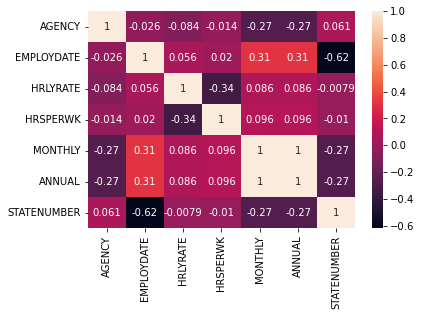

In [21]:
sns.heatmap(df_new.corr(),annot=True)

In [22]:
df_new.corr().style.background_gradient(cmap='coolwarm')

,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
AGENCY,1.000000,-0.026411,-0.083653,-0.013847,-0.266452,-0.266452,0.060815
EMPLOYDATE,-0.026411,1.000000,0.055672,0.019903,0.306320,0.306320,-0.619188
HRLYRATE,-0.083653,0.055672,1.000000,-0.337784,0.086291,0.086291,-0.007922
HRSPERWK,-0.013847,0.019903,-0.337784,1.000000,0.096041,0.096041,-0.010072
MONTHLY,-0.266452,0.306320,0.086291,0.096041,1.000000,1.000000,-0.265438
ANNUAL,-0.266452,0.306320,0.086291,0.096041,1.000000,1.000000,-0.265438
STATENUMBER,0.060815,-0.619188,-0.007922,-0.010072,-0.265438,-0.265438,1.000000


In [23]:
categorical_data=df_new.select_dtypes(exclude=['int64','float64'])
categorical_data.head()

,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME


## Catagorical encoding

In [24]:
categorical_data

,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
149477,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
149478,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME
149479,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME


In [25]:
for col in df_new.columns:
    print(col,':',len(df_new[col].unique()),'labels')

AGENCY : 113 labels
AGENCYNAME : 113 labels
LASTNAME : 38675 labels
FIRSTNAME : 23559 labels
MI : 27 labels
CLASSCODE : 1481 labels
CLASSTITLE : 1422 labels
ETHNICITY : 6 labels
GENDER : 2 labels
STATUS : 11 labels
EMPLOYDATE : 6295 labels
HRLYRATE : 206 labels
HRSPERWK : 58 labels
MONTHLY : 40552 labels
ANNUAL : 40552 labels
STATENUMBER : 149465 labels


In [26]:
df_new.drop('AGENCYNAME',axis=1,inplace=True)

## Frequency encoding

In [27]:
class_encoding=categorical_data['CLASSCODE'].value_counts().to_dict()

In [28]:
class_encoding

{'4504': 9267,
 '4505': 7895,
 '4503': 4718,
 '5622': 3646,
 '5121': 3307,
 '9928': 2251,
 '5026': 1854,
 '5023': 1778,
 '154': 1774,
 '4510': 1743,
 '55': 1727,
 '152': 1693,
 '5151': 1578,
 '156': 1466,
 '5122': 1433,
 '5025': 1348,
 '2123': 1308,
 '2122': 1265,
 '57': 1262,
 '1574': 1227,
 '150': 1169,
 '5620': 1117,
 '171': 1102,
 '9940': 1102,
 '1572': 1083,
 '1573': 1039,
 '172': 1034,
 '4541': 1007,
 '5024': 976,
 '1603': 870,
 '4411': 857,
 '1575': 857,
 '5505': 827,
 '2128': 794,
 '1604': 771,
 '1621': 765,
 '4511': 744,
 '5624': 741,
 '4412': 696,
 '2129': 696,
 '2127': 690,
 '1601': 688,
 '5017': 682,
 '5123': 669,
 '9022': 661,
 '59': 627,
 '1353': 622,
 '2119': 616,
 '1622': 589,
 '9055': 588,
 '256': 583,
 '4413': 569,
 '4540': 569,
 '5702': 567,
 '2124': 556,
 '1571': 554,
 '1602': 541,
 '1584': 537,
 '5152': 535,
 '173': 533,
 '4421': 529,
 '7110': 527,
 '1600': 502,
 '255': 494,
 '5016': 489,
 '1570': 480,
 '132': 476,
 '8003': 475,
 '5541': 474,
 'D520    ': 472,
 '13

In [29]:
categorical_data['CLASSCODE']=categorical_data['CLASSCODE'].map(class_encoding)
categorical_data.head(10)

,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,324,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,47,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,324,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,47,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,9267,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
5,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,372,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
6,TEXAS DEPARTMENT OF TRANSPORTATION ...,RICHTER,WILLIAM,J,354,CONTRACT SPEC IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
7,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,372,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
8,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,SPINKS,DARREL,D,1,"EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS ...",WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME
9,DEPARTMENT OF STATE HEALTH SERVICES ...,ADAMS III,LEE,A,463,INSPECTOR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME


In [30]:
class_title_encoding=categorical_data['CLASSTITLE'].value_counts().to_dict()

In [31]:
class_title_encoding

{'CORREC  OFFICER IV                                ': 9267,
 'CORREC  OFFICER V                                 ': 7895,
 'CORREC OFFCR III                                  ': 4718,
 'TEXAS WORKS ADVISOR II                            ': 3646,
 'DIRECT SUPPORT PROFESSIONAL I                     ': 3307,
 'TROOPER                                           ': 2251,
 'CHILD PROTECTIVE SVCS SPEC IV                     ': 1854,
 'CHILD PROTECTIVE SVCS SPEC I                      ': 1773,
 'ADMINISTRATIVE ASST III                           ': 1771,
 'SGT OF CORREC OFFCRS                              ': 1743,
 'CLERK I                                           ': 1727,
 'ADMINISTRATIVE ASST II                            ': 1690,
 'PSYCHIATRIC NURSING ASST I                        ': 1578,
 'ADMINISTRATIVE ASST IV                            ': 1465,
 'DIRECT SUPPORT PROF II                            ': 1433,
 'CHILD PROTECTIVE SVCS SPEC III                    ': 1348,
 'ENGINEERING TECHNICIAN

In [32]:
categorical_data['CLASSTITLE']=categorical_data['CLASSTITLE'].map(class_title_encoding)
categorical_data.head(10)

,AGENCYNAME,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,9267,9267,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
5,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,372,372,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
6,TEXAS DEPARTMENT OF TRANSPORTATION ...,RICHTER,WILLIAM,J,354,354,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
7,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,372,372,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
8,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,SPINKS,DARREL,D,1,1,WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME
9,DEPARTMENT OF STATE HEALTH SERVICES ...,ADAMS III,LEE,A,463,463,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME


In [33]:
df_new.replace(' ','other',inplace=True)

In [34]:
ordinal_labels=df_new.groupby(['MI'])['ANNUAL'].mean().sort_values().index
ordinal_labels

Index(['O', 'U', 'N', 'I', 'Y', 'Q', 'other', 'Z', 'L', 'M', 'D', 'V', 'S',
       'A', 'R', 'G', 'K', 'J', 'E', 'F', 'C', 'T', 'P', 'B', 'X', 'W', 'H'],
      dtype='object', name='MI')

In [35]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'O': 0,
 'U': 1,
 'N': 2,
 'I': 3,
 'Y': 4,
 'Q': 5,
 'other': 6,
 'Z': 7,
 'L': 8,
 'M': 9,
 'D': 10,
 'V': 11,
 'S': 12,
 'A': 13,
 'R': 14,
 'G': 15,
 'K': 16,
 'J': 17,
 'E': 18,
 'F': 19,
 'C': 20,
 'T': 21,
 'P': 22,
 'B': 23,
 'X': 24,
 'W': 25,
 'H': 26}

In [36]:
#MI_encoding=df2_cat['MI'].value_counts().to_dict()

In [37]:
#df2_cat['MI']=df2_cat['MI'].map(MI_encoding)
#df2_cat.head(5)

In [38]:
df_new['MI']=df_new['MI'].map(ordinal_labels2)
df_new.head(10)

,AGENCY,LASTNAME,FIRSTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,241,RUCKER,MORTON,11,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,12751,75.96150,29.0,9545.82,114549.84,127717
1,212,RUCKER,MORTON,11,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2906,81.04454,4.0,1404.77,16857.24,127717
2,241,SPECIA JR,JOHN,17,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1080,75.96150,29.0,9545.82,114549.84,59115
3,212,SPECIA JR,JOHN,17,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,1598,81.04453,4.0,1404.77,16857.24,59115
4,696,ONTIVEROS,ESTHER,6,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,931,0.00000,40.0,3284.27,39411.24,165030
5,302,ROGERS,SHAUNA,6,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,1020,0.00000,40.0,12899.00,154788.00,1177785
6,601,RICHTER,WILLIAM,17,1984,CONTRACT SPEC IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,938,0.00000,40.0,5835.50,70026.00,1085586
7,510,SPINKS,DARREL,10,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,1051,0.00000,40.0,10000.00,120000.00,147334
8,520,SPINKS,DARREL,10,E178,"EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS ...",WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME,1048,49.40717,20.0,4281.95,51383.40,147334
9,537,ADAMS III,LEE,13,1323,INSPECTOR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,1233,0.00000,40.0,3447.25,41367.00,129635


In [39]:
categorical_data['ETHNICITY']=df_new['ETHNICITY']
categorical_data['STATUS']=df_new['STATUS']

In [40]:
categorical_data.drop('FIRSTNAME',axis=1,inplace=True)

In [41]:
categorical_data.head(10)

,AGENCYNAME,LASTNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,V,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,V,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,J,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,J,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,,9267,9267,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
5,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,,372,372,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
6,TEXAS DEPARTMENT OF TRANSPORTATION ...,RICHTER,J,354,354,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
7,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,D,372,372,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
8,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,SPINKS,D,1,1,WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME
9,DEPARTMENT OF STATE HEALTH SERVICES ...,ADAMS III,A,463,463,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME


In [42]:
categorical_data.drop('LASTNAME',axis=1,inplace=True)

In [43]:
categorical_data.head(10)

,AGENCYNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",V,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,V,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",J,324,324,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,J,47,47,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,,9267,9267,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
5,OFFICE OF THE ATTORNEY GENERAL ...,,372,372,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME
6,TEXAS DEPARTMENT OF TRANSPORTATION ...,J,354,354,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
7,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,D,372,372,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME
8,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,D,1,1,WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME
9,DEPARTMENT OF STATE HEALTH SERVICES ...,A,463,463,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME


In [44]:
categorical_data['GENDER']=df_new['GENDER']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
categorical_data['GENDER']=encoder.fit_transform(categorical_data['GENDER'])

In [45]:
categorical_data

,AGENCYNAME,MI,CLASSCODE,CLASSTITLE,ETHNICITY,GENDER,STATUS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",V,324,324,WHITE,1,URP - UNCLASSIFIED REGULAR PART-TIME
1,OFFICE OF COURT ADMINISTRATION ...,V,47,47,WHITE,1,CTP - CLASSIFIED TEMPORARY PART-TIME
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",J,324,324,WHITE,1,URP - UNCLASSIFIED REGULAR PART-TIME
3,OFFICE OF COURT ADMINISTRATION ...,J,47,47,WHITE,1,CTP - CLASSIFIED TEMPORARY PART-TIME
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,,9267,9267,HISPANIC,0,CRF - CLASSIFIED REGULAR FULL-TIME
...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,P,385,385,WHITE,1,CRF - CLASSIFIED REGULAR FULL-TIME
149477,STATE PRESERVATION BOARD ...,A,48,48,WHITE,0,CRF - CLASSIFIED REGULAR FULL-TIME
149478,STATE PRESERVATION BOARD ...,C,221,221,WHITE,1,CRP - CLASSIFIED REGULAR PART-TIME
149479,STATE PRESERVATION BOARD ...,R,1083,1082,WHITE,1,CRF - CLASSIFIED REGULAR FULL-TIME


In [46]:
encoded_categorcal_data=pd.get_dummies(categorical_data,columns=['ETHNICITY','STATUS'],drop_first=True,)

In [47]:
encoded_categorcal_data

,AGENCYNAME,MI,CLASSCODE,CLASSTITLE,GENDER,ETHNICITY_ASIAN,ETHNICITY_BLACK,ETHNICITY_HISPANIC,ETHNICITY_OTHER,ETHNICITY_WHITE,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",V,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,OFFICE OF COURT ADMINISTRATION ...,V,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",J,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,OFFICE OF COURT ADMINISTRATION ...,J,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,,9267,9267,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,P,385,385,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
149477,STATE PRESERVATION BOARD ...,A,48,48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
149478,STATE PRESERVATION BOARD ...,C,221,221,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
149479,STATE PRESERVATION BOARD ...,R,1083,1082,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [48]:
encoded_categorcal_data['MI']=df_new['MI']

In [49]:
encoded_categorcal_data

,AGENCYNAME,MI,CLASSCODE,CLASSTITLE,GENDER,ETHNICITY_ASIAN,ETHNICITY_BLACK,ETHNICITY_HISPANIC,ETHNICITY_OTHER,ETHNICITY_WHITE,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME,STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME,STATUS_ERF - EXEMPT REGULAR FULL-TIME,STATUS_ERP - EXEMPT REGULAR PART-TIME,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",11,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,OFFICE OF COURT ADMINISTRATION ...,11,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",17,324,324,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,OFFICE OF COURT ADMINISTRATION ...,17,47,47,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,6,9267,9267,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,22,385,385,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
149477,STATE PRESERVATION BOARD ...,13,48,48,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
149478,STATE PRESERVATION BOARD ...,20,221,221,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
149479,STATE PRESERVATION BOARD ...,14,1083,1082,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [50]:
after_EDA_data=pd.concat([encoded_categorcal_data,numaric_data],axis=1)

In [51]:
after_EDA_data

,AGENCYNAME,MI,CLASSCODE,CLASSTITLE,GENDER,ETHNICITY_ASIAN,ETHNICITY_BLACK,ETHNICITY_HISPANIC,ETHNICITY_OTHER,ETHNICITY_WHITE,...,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",11,324,324,1,0,0,0,0,1,...,1,0,0,241,12751,75.96150,29.0,9545.82,114549.84,127717
1,OFFICE OF COURT ADMINISTRATION ...,11,47,47,1,0,0,0,0,1,...,0,0,0,212,2906,81.04454,4.0,1404.77,16857.24,127717
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",17,324,324,1,0,0,0,0,1,...,1,0,0,241,1080,75.96150,29.0,9545.82,114549.84,59115
3,OFFICE OF COURT ADMINISTRATION ...,17,47,47,1,0,0,0,0,1,...,0,0,0,212,1598,81.04453,4.0,1404.77,16857.24,59115
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,6,9267,9267,0,0,0,1,0,0,...,0,0,0,696,931,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,22,385,385,1,0,0,0,0,1,...,0,0,0,809,1904,0.00000,40.0,2899.00,34788.00,770781
149477,STATE PRESERVATION BOARD ...,13,48,48,0,0,0,0,0,1,...,0,0,0,809,2744,0.00000,40.0,5500.00,66000.00,847431
149478,STATE PRESERVATION BOARD ...,20,221,221,1,0,0,0,0,1,...,0,0,0,809,3745,12.93000,20.0,1120.60,13447.20,34266
149479,STATE PRESERVATION BOARD ...,14,1083,1082,1,0,0,0,0,1,...,0,0,0,809,12169,0.00000,40.0,5744.16,68929.92,123490


<AxesSubplot:>

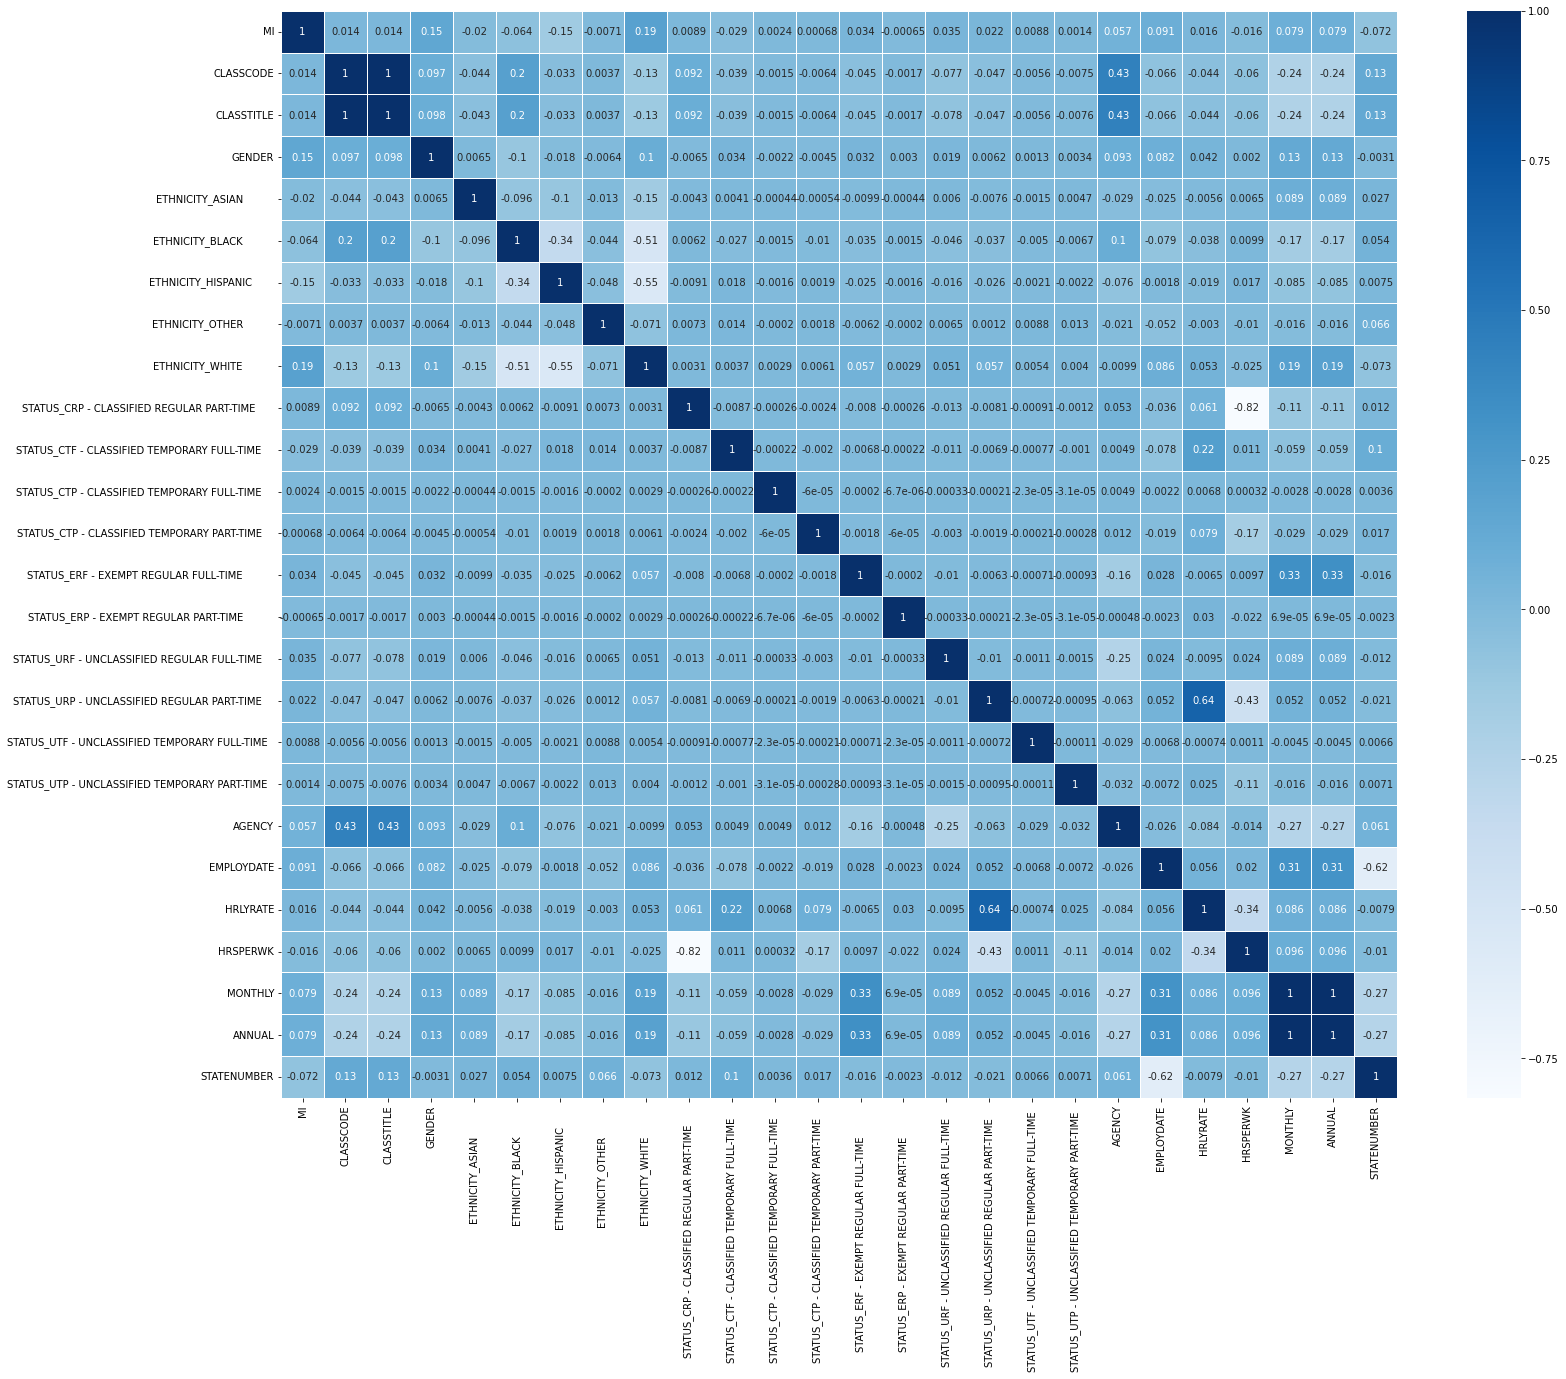

In [52]:
import seaborn as sns 
corr1 = after_EDA_data.corr()
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(corr1,linewidths=.5,cmap= 'Blues', ax=ax,annot=True)

## Data preprocessing

In [53]:
from scipy.stats import skew
print(numaric_data['HRLYRATE'].skew())
numaric_data['HRSPERWK'].skew()

15.91809864054434


-8.379277707265828

In [54]:
skwed_data_check=numaric_data

In [55]:
skwed_data_check

,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL,STATENUMBER
0,241,12751,75.96150,29.0,9545.82,114549.84,127717
1,212,2906,81.04454,4.0,1404.77,16857.24,127717
2,241,1080,75.96150,29.0,9545.82,114549.84,59115
3,212,1598,81.04453,4.0,1404.77,16857.24,59115
4,696,931,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...,...
149476,809,1904,0.00000,40.0,2899.00,34788.00,770781
149477,809,2744,0.00000,40.0,5500.00,66000.00,847431
149478,809,3745,12.93000,20.0,1120.60,13447.20,34266
149479,809,12169,0.00000,40.0,5744.16,68929.92,123490


## Outliers

<AxesSubplot:xlabel='AGENCY'>

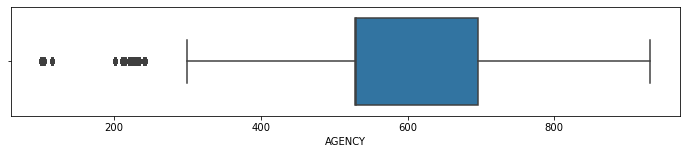

In [56]:
plt.figure(figsize=(12,2))
sns.boxplot(numaric_data['AGENCY'])

<AxesSubplot:xlabel='EMPLOYDATE'>

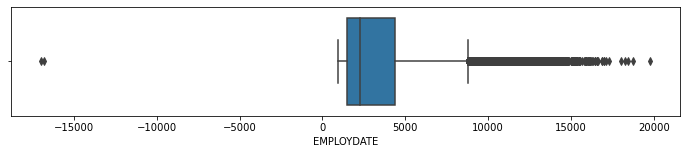

In [57]:
plt.figure(figsize=(12,2))
sns.boxplot(numaric_data['EMPLOYDATE'])

<AxesSubplot:xlabel='HRLYRATE'>

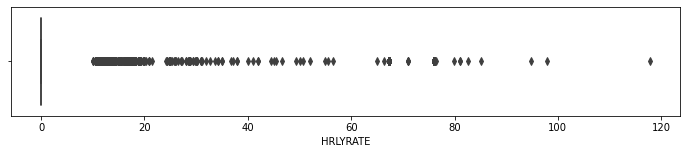

In [58]:
plt.figure(figsize=(12,2))
sns.boxplot(numaric_data['HRLYRATE'])

<AxesSubplot:xlabel='HRSPERWK'>

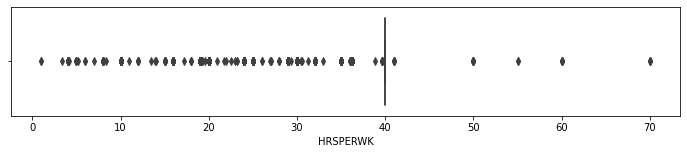

In [59]:
plt.figure(figsize=(12,2))
sns.boxplot(numaric_data['HRSPERWK'])

<AxesSubplot:xlabel='MONTHLY'>

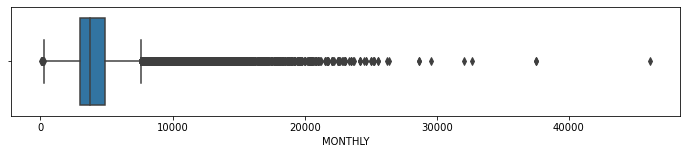

In [60]:
plt.figure(figsize=(12,2))
sns.boxplot(numaric_data['MONTHLY'])

<AxesSubplot:xlabel='ANNUAL'>

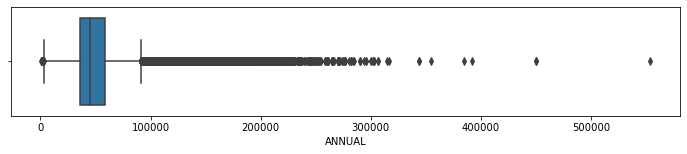

In [61]:
plt.figure(figsize=(12,2))
sns.boxplot(numaric_data['ANNUAL'])

<AxesSubplot:xlabel='STATENUMBER'>

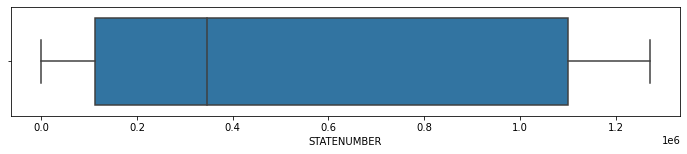

In [62]:
plt.figure(figsize=(12,2))
sns.boxplot(numaric_data['STATENUMBER'])

In [63]:
print(numaric_data['EMPLOYDATE'].median())
print(numaric_data['HRLYRATE'].median())
print(numaric_data["HRSPERWK"].median())
print(numaric_data["MONTHLY"].median())
print(numaric_data["ANNUAL"].median())

2289.0
0.0
40.0
3720.17
44642.04


In [64]:
numaric_data.drop('MONTHLY',axis=1)

,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,ANNUAL,STATENUMBER
0,241,12751,75.96150,29.0,114549.84,127717
1,212,2906,81.04454,4.0,16857.24,127717
2,241,1080,75.96150,29.0,114549.84,59115
3,212,1598,81.04453,4.0,16857.24,59115
4,696,931,0.00000,40.0,39411.24,165030
...,...,...,...,...,...,...
149476,809,1904,0.00000,40.0,34788.00,770781
149477,809,2744,0.00000,40.0,66000.00,847431
149478,809,3745,12.93000,20.0,13447.20,34266
149479,809,12169,0.00000,40.0,68929.92,123490


In [65]:
import scipy.stats as stat
import pylab
#### Q-Q plot
def plot_data(numaric_data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    numaric_data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(numaric_data[feature],dist='norm',plot=pylab)
    plt.show()

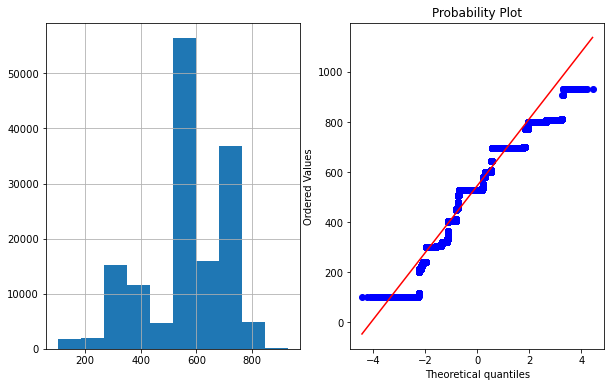

In [66]:
plot_data(numaric_data,'AGENCY')

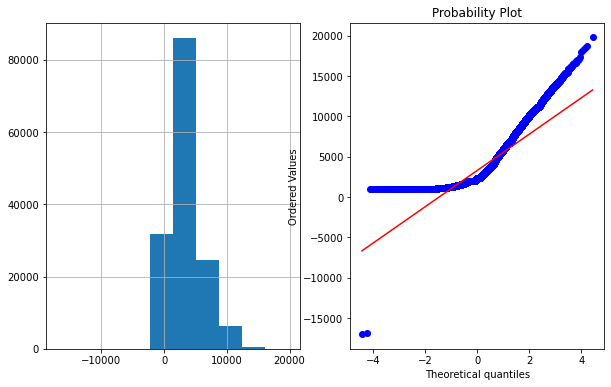

In [67]:
plot_data(numaric_data,'EMPLOYDATE')

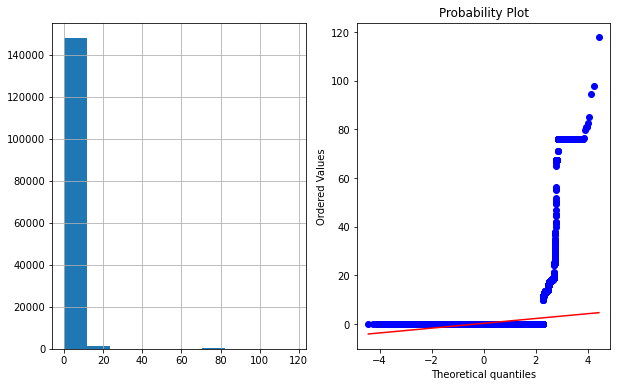

In [68]:
plot_data(numaric_data,'HRLYRATE')

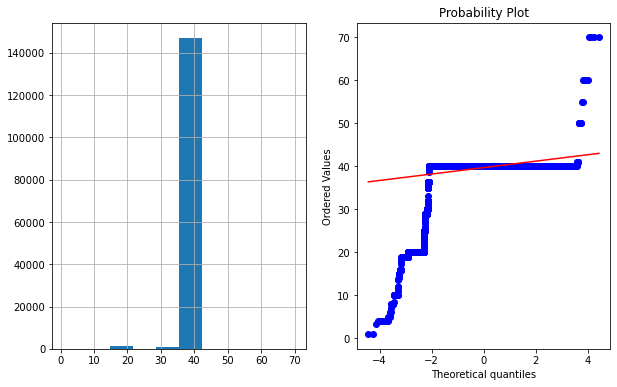

In [69]:
plot_data(numaric_data,'HRSPERWK')

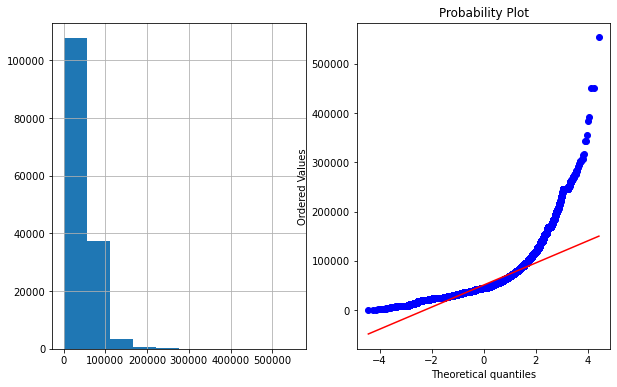

In [70]:
plot_data(numaric_data,'ANNUAL')

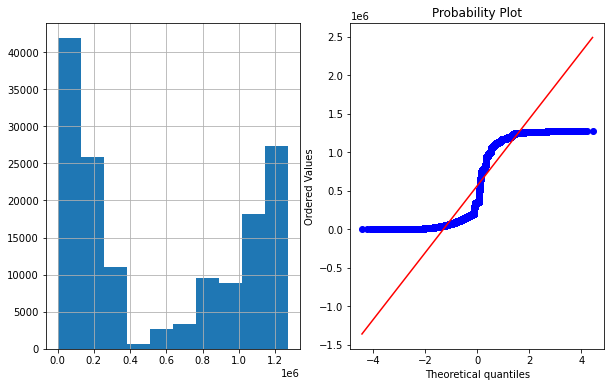

In [71]:
plot_data(numaric_data,'STATENUMBER')

In [72]:
after_EDA_data.drop('AGENCYNAME',axis=1,inplace=True)

In [73]:
after_EDA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 26 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   MI                                               149481 non-null  int64  
 1   CLASSCODE                                        149481 non-null  int64  
 2   CLASSTITLE                                       149481 non-null  int64  
 3   GENDER                                           149481 non-null  int32  
 4   ETHNICITY_ASIAN                                  149481 non-null  uint8  
 5   ETHNICITY_BLACK                                  149481 non-null  uint8  
 6   ETHNICITY_HISPANIC                               149481 non-null  uint8  
 7   ETHNICITY_OTHER                                  149481 non-null  uint8  
 8   ETHNICITY_WHITE                                  149481 non-null  uint8  
 9   STATUS_CRP - CL

## Modeling

In [74]:
X=after_EDA_data.iloc[:,:-1]

In [75]:
X

,MI,CLASSCODE,CLASSTITLE,GENDER,ETHNICITY_ASIAN,ETHNICITY_BLACK,ETHNICITY_HISPANIC,ETHNICITY_OTHER,ETHNICITY_WHITE,STATUS_CRP - CLASSIFIED REGULAR PART-TIME,...,STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME,STATUS_URP - UNCLASSIFIED REGULAR PART-TIME,STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME,AGENCY,EMPLOYDATE,HRLYRATE,HRSPERWK,MONTHLY,ANNUAL
0,11,324,324,1,0,0,0,0,1,0,...,0,1,0,0,241,12751,75.96150,29.0,9545.82,114549.84
1,11,47,47,1,0,0,0,0,1,0,...,0,0,0,0,212,2906,81.04454,4.0,1404.77,16857.24
2,17,324,324,1,0,0,0,0,1,0,...,0,1,0,0,241,1080,75.96150,29.0,9545.82,114549.84
3,17,47,47,1,0,0,0,0,1,0,...,0,0,0,0,212,1598,81.04453,4.0,1404.77,16857.24
4,6,9267,9267,0,0,0,1,0,0,0,...,0,0,0,0,696,931,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,22,385,385,1,0,0,0,0,1,0,...,0,0,0,0,809,1904,0.00000,40.0,2899.00,34788.00
149477,13,48,48,0,0,0,0,0,1,0,...,0,0,0,0,809,2744,0.00000,40.0,5500.00,66000.00
149478,20,221,221,1,0,0,0,0,1,1,...,0,0,0,0,809,3745,12.93000,20.0,1120.60,13447.20
149479,14,1083,1082,1,0,0,0,0,1,0,...,0,0,0,0,809,12169,0.00000,40.0,5744.16,68929.92


In [76]:
y=after_EDA_data.iloc[:,-1]

In [77]:
y

0         127717
1         127717
2          59115
3          59115
4         165030
           ...  
149476    770781
149477    847431
149478     34266
149479    123490
149480    103583
Name: STATENUMBER, Length: 149481, dtype: int64

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_X = scaler.fit_transform(X)

In [79]:
X.isnull().sum()

MI                                                 0
CLASSCODE                                          0
CLASSTITLE                                         0
GENDER                                             0
ETHNICITY_ASIAN                                    0
ETHNICITY_BLACK                                    0
ETHNICITY_HISPANIC                                 0
ETHNICITY_OTHER                                    0
ETHNICITY_WHITE                                    0
STATUS_CRP - CLASSIFIED REGULAR PART-TIME          0
STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME        0
STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME        0
STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME        0
STATUS_ERF - EXEMPT REGULAR FULL-TIME              0
STATUS_ERP - EXEMPT REGULAR PART-TIME              0
STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME        0
STATUS_URP - UNCLASSIFIED REGULAR PART-TIME        0
STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME      0
STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME 

# Feature importance

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((119584, 25), (29897, 25), (119584,), (29897,))

In [81]:
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# from xgboost import XGBRegressor

## DecisionTree

In [82]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('DECISIONTREE REGRESSOR',model.score(x_train,y_train)*100)
print('DECISIONTREE REGRESSOR',model.score(x_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

DECISIONTREE REGRESSOR 98.35008772671401
DECISIONTREE REGRESSOR 36.89221693423394
Mean Squard Error IS :      145374913529.98444
Mean Absolute Error Is :    212772.99504871006
Median Absolute Error Is :  65673.0


In [83]:
from sklearn.metrics import precision_recall_curve,r2_score,confusion_matrix,classification_report
print(r2_score(y_test,y_predict))

0.36892216934233946


### Hyper parameter tunning for DecisionTree

In [84]:
from scipy.stats import randint

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3,4,5,6], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9)} 

In [85]:
# Instantiate a Decision Tree regressor: tree
tree = DecisionTreeRegressor()
  
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 

# Fit it to the data
tree_cv.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

Tuned Decision Tree Parameters: {'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 5}
Best score is 0.5341339336963126


## K-Nearest Neighbor(KNN)

In [86]:
model=KNeighborsRegressor(n_neighbors=25,leaf_size=8,metric= 'minkowski',weights='distance',p=2)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('KNeighborsRegressor',model.score(x_train,y_train)*100)
print('KNeighborsRegressor',model.score(x_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

KNeighborsRegressor 98.34998266587625
KNeighborsRegressor 61.47881544239202
Mean Squard Error IS :      88737293596.55891
Mean Absolute Error Is :    197028.65893629147
Median Absolute Error Is :  100386.33153219972


### Hyper parameter tunning for KNN

In [87]:
#List Hyperparameters that we want to tune.
n_neighbors=list(range(1,30))
weights=['uniform','distance']
leaf_size=list(range(1,50))
algoritham=['auto', 'ball_tree', 'kd_tree', 'brute']
metric=['minkowski','Euclidean']

In [88]:
#Convert to dictionary
kNN_grid={'n_neighbors':n_neighbors,'weights':weights,'leaf_size':leaf_size,'metric':metric}

#Use GridSearch
random_cv = RandomizedSearchCV(estimator=model,param_distributions=kNN_grid,cv=5,random_state=42,n_jobs=1,scoring='r2')

#Fit the model
random_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=KNeighborsRegressor(leaf_size=8, n_neighbors=25,
                                                 weights='distance'),
                   n_jobs=1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'metric': ['minkowski', 'Euclidean'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
              

In [89]:
#Print The value of best Hyperparameters
random_cv.best_estimator_

KNeighborsRegressor(leaf_size=8, n_neighbors=25)

In [90]:
random_cv.best_params_

{'weights': 'uniform',
 'n_neighbors': 25,
 'metric': 'minkowski',
 'leaf_size': 8}

In [91]:
random_cv.best_score_

0.6141476696830217

In [92]:
random_cv.fit(x_test, y_test)

RandomizedSearchCV(cv=5,
                   estimator=KNeighborsRegressor(leaf_size=8, n_neighbors=25,
                                                 weights='distance'),
                   n_jobs=1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'metric': ['minkowski', 'Euclidean'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
              

In [93]:
random_cv.best_score_

0.5950319269622448

## AdaBoost

In [96]:
model=AdaBoostRegressor(learning_rate=0.01, loss = 'exponential', n_estimators=100)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('AdaBoostRegressor',model.score(x_train,y_train)*100)
print('AdaBoostRegressor',model.score(x_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

AdaBoostRegressor 57.97830469964609
AdaBoostRegressor 58.51142937541234
Mean Squard Error IS :      95572955886.38611
Mean Absolute Error Is :    230810.51414958577
Median Absolute Error Is :  179752.99520983768


### Hyper parameter tunning for AdaBoost

In [97]:
#List Hyperparameters that we want to tune.
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

In [98]:
#Convert to dictionary
pre_gs_inst = RandomizedSearchCV(estimator=model,param_distributions = param_dist,cv=3,n_iter = 10,n_jobs=-1)

#Fit the model
pre_gs_inst.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=AdaBoostRegressor(learning_rate=0.01,
                                               loss='exponential',
                                               n_estimators=100),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

In [99]:
#Print The value of best Hyperparameters
pre_gs_inst.best_params_

{'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.01}

In [100]:
pre_gs_inst.best_score_

0.5800585398706666

In [101]:
pre_gs_inst.fit(x_test, y_test)

RandomizedSearchCV(cv=3,
                   estimator=AdaBoostRegressor(learning_rate=0.01,
                                               loss='exponential',
                                               n_estimators=100),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

In [102]:
pre_gs_inst.best_score_

0.5867483259107379

## GradientBoostingRegressor

In [103]:
model=GradientBoostingRegressor(learning_rate=0.01, loss='squared_error', n_estimators=100)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('GradientBoostingRegressor',model.score(x_train,y_train)*100)
print('GradientBoostingRegressor',model.score(x_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

GradientBoostingRegressor 50.813953579385895
GradientBoostingRegressor 51.16689847822703
Mean Squard Error IS :      112491796831.6294
Mean Absolute Error Is :    293623.7854262216
Median Absolute Error Is :  299312.88754421554


### Hyper parameter tunning for GradientBoostingRegressor

In [104]:
from scipy.stats import loguniform

### Hyper parameter tunning for GradientBoostingRegressor
param_dist = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
    "loss": ['squared_error', 'absolute_error', 'huber', 'quantile']
}

In [105]:
# Instantiate the RandomizedSearchCV object: tree_cv
pre_gbr_inst = RandomizedSearchCV(estimator=model,param_distributions=param_dist,cv=5,random_state=42,n_jobs=1,scoring='r2')

#Fit the model
pre_gbr_inst.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(learning_rate=0.01),
                   n_jobs=1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000209005F5040>,
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]},
                   random_state=42, scoring='r2')

In [106]:
# print best parameter after tuning
pre_gbr_inst.best_params_

{'learning_rate': 0.5246634533625283,
 'loss': 'huber',
 'max_leaf_nodes': 50,
 'n_estimators': 500}

In [107]:
pre_gbr_inst.best_score_

0.6458085357166619

In [108]:
pre_gbr_inst.fit(x_test, y_test)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(learning_rate=0.01),
                   n_jobs=1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000209005F5040>,
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]},
                   random_state=42, scoring='r2')

In [109]:
pre_gbr_inst.best_score_

0.6487635124143208

## Support Vector Regression (SVR)

In [106]:
#kernel='rbf', degree=3, gamma='scale',tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1
model=SVR()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('SVR',model.score(x_train,y_train)*100)
print('SVR',model.score(x_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

SVR -20.297809815492695
SVR -20.387922994133877
Mean Squard Error IS :      277325284538.8032
Mean Absolute Error Is :    440926.0251868863
Median Absolute Error Is :  323161.85345989093


### Hyper parameter tunning for Support Vector Regression (SVR)

In [107]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']} 

In [108]:
from sklearn.model_selection import GridSearchCV

# Instantiate the Support Vector Regression (SVR) 
pre_svr_inst = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3, cv=2, random_state=42, n_jobs=-1, scoring='r2')
  
# fitting the model for grid search
pre_svr_inst.fit(x_train, y_train)

In [109]:
# print best parameter after tuning
print(pre_svr_inst.best_params_)

In [ ]:
# print how our model looks after hyper-parameter tuning
print(pre_svr_inst.best_estimator_)

In [ ]:
pre_svr_inst.best_score_

In [110]:
pre_svr_inst.fit(x_test, y_test)

In [ ]:
pre_svr_inst.best_score_

## Nu Support Vector Regression (NuSVR)

In [116]:
from sklearn.svm import NuSVR
model=NuSVR(nu=0.5,C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('NuSVR',model.score(x_train,y_train)*100)
print('NuSVR',model.score(x_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

NuSVR -0.33910596880928345
NuSVR -0.27632562306028063
Mean Squard Error IS :      230996264777.12326
Mean Absolute Error Is :    458791.22380199796
Median Absolute Error Is :  493572.40015789215


## Linear Regression

In [110]:
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('LinearRegression',model.score(x_train,y_train)*100)
print('LinearRegression',model.score(x_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

LinearRegression 40.33476065532401
LinearRegression 40.66609242685354
Mean Squard Error IS :      136681424442.58035
Mean Absolute Error Is :    324514.2211189139
Median Absolute Error Is :  331282.1605035942


## ElasticNet

In [111]:
model=ElasticNet()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('ElasticNet',model.score(x_train,y_train)*100)
print('ElasticNet',model.score(x_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

ElasticNet 39.73993059669861
ElasticNet 40.211585319361355
Mean Squard Error IS :      137728425751.1445
Mean Absolute Error Is :    326811.0385257531
Median Absolute Error Is :  335241.4139910855


## Lasso

In [112]:
model=Lasso()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('Lasso',model.score(x_train,y_train)*100)
print('Lasso',model.score(x_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

Lasso 40.3341465291015
Lasso 40.66683296688186
Mean Squard Error IS :      136679718536.63101
Mean Absolute Error Is :    324512.2332136873
Median Absolute Error Is :  331263.8391224691


## Ridge

In [113]:
model=Ridge()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('Ridge',model.score(x_train,y_train)*100)
print('Ridge',model.score(x_test,y_test)*100)
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

Ridge 40.3341742269261
Ridge 40.666086310326364
Mean Squard Error IS :      136681438532.59537
Mean Absolute Error Is :    324517.01562923816
Median Absolute Error Is :  331294.00476229243


## Random Forest

In [82]:
model=RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('LinearRegression',model.score(x_train,y_train)*100)
print('LinearRegression',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

LinearRegression 93.81843862040414
LinearRegression 64.32672035487738
Mena Squard Error IS :      82176867761.8766
Mean Absolute Error Is :    190329.92190750537
Median Absolute Error Is :  98896.88500000001


### Hyper parameter tunning for Random Forest

In [83]:
random_grid = { 
    'bootstrap': [True], 
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [84]:
# Using the random grid and searching for best hyperparameters
rf = RandomForestRegressor() #creating base model

random_cv_rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                                  cv = 2, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
random_cv_rf.fit(x_train,y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


In [ ]:
# print best parameter after tuning
print(random_cv_rf.best_params_)

In [ ]:
# print how our model looks after hyper-parameter tuning
#print(random_cv_rf.best_estimator_)

In [ ]:
random_cv_rf.best_score_

In [ ]:
random_cv_rf.fit(x_test, y_test)

In [ ]:
random_cv_rf.best_score_

### Hyper parameter tunning for Random Forest using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {'bootstrap': [True], 
              'max_depth': [80, 90, 100, 110], 
              'max_features': [2, 3], 
              'min_samples_leaf': [3, 4, 5], 
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200, 300, 1000]
             }

In [ ]:
# Create a based model

rf = RandomForestRegressor()

# Instantiate the grid search model

grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data

grid_search_rf.fit(x_train,y_train)

In [ ]:
# print best parameter after tuning
print(grid_search_rf.best_params_)

In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid_search_rf.best_estimator_)

In [ ]:
grid_search_rf.best_score_

In [ ]:
grid_search_rf.fit(x_test, y_test)

In [ ]:
grid_search_rf.best_score_

## XGBRegressor

In [ ]:
# !pip install xgboost

In [82]:
from xgboost import XGBRegressor 

model=XGBRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('XGBRegressor',model.score(x_train,y_train)*100)
print('XGBRegressor',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

XGBRegressor 71.09030556504347
XGBRegressor 67.54413003448789
Mena Squard Error IS :      74765251773.45758
Mean Absolute Error Is :    187117.56211084806
Median Absolute Error Is :  114142.5625


## Hyper parameter tunning for XGBRegressor

In [83]:
hyper_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }

In [84]:
# Create a based model

XGBR = XGBRegressor()

# Instantiate the grid search model

grid_xgbr = RandomizedSearchCV(XGBR, hyper_grid, scoring="accuracy", n_iter = 500, cv=4)

In [ ]:
# Fit the grid search to the data

grid_xgbr.fit(x_train,y_train)

In [ ]:
# print best parameter after tuning
print(grid_xgbr.best_params_)

In [ ]:
# print how our model looks after hyper-parameter tuning
#print(grid_xgbr.best_estimator_)

In [ ]:
grid_xgbr.best_score_

In [ ]:
grid_xgbr.fit(x_test, y_test)

In [ ]:
grid_xgbr.best_score_

### Conclusion

The dataset has been examined, the model has been created, and the outcomes have been forecasted using the test data in accordance with the stated objectives. In the project at hand, we made an effort to apply every method and the hyper parameter, however because of the hyper parameter, the project is taking longer to complete.